In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gaussian Elimination.
1. Задать матрицу системы $A$ и вектор правой части $\vec{b}$.<br> 
   a) Составить программу, реализующую **метод Гаусса**
   (схема частичного выбора) для произвольной системы $A\vec{x}=\vec{b}$. <br> 
   б)  Используя составленную программу, найти
   решение заданной системы. Используя встроенную функцию , найти решение x системы $A\vec{x}=\vec{b}$ с помощью
   метода Гаусса.

In [2]:
def var_coeff(var_num, i, j):
    c =  0.1 * var_num * i * j
    return 55 / (c**2  + 3*c  + 100)

In [4]:
print('Input number of variant:')
var_num = int(input())
print('Input matrix power:')
n = int(input())
A = np.asarray([[var_coeff(var_num, i, j) for i in range(n)] for j in range(n)])
b = np.full((n, 1), var_num)

Input number of variant:
4
Input matrix power:
7


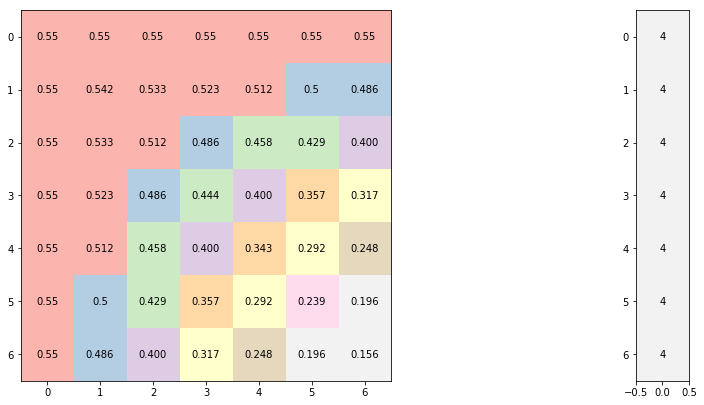

In [5]:
fig = plt.figure(figsize=(15, 15))
plt.clf()
#show matrix A
ax = fig.add_subplot(221)
ax.set_aspect(1)
res = ax.imshow(np.array(A), cmap=plt.cm.Pastel1_r, 
                interpolation='nearest')

width, height = A.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(A[x, y])[:5], xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
# show b vector      
ax = fig.add_subplot(222)
ax.set_aspect(1)
res = ax.imshow(np.array(b), cmap=plt.cm.Pastel1_r, 
                interpolation='nearest')

width, height = b.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(b[x, y])[:5], xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

Определим функцию ```GaussEl``` и найдем решение системы уравнений $A\vec{x}=\vec{b}$.

In [78]:
def GaussEl(A, b):
    n = A.shape[0]
    Ab = np.hstack((A, b))
    #forward pass
    for k in range(n - 1):
        # find k-th pivot
        pivot = np.argmax(abs(Ab[k:, k])) + k
        if Ab[pivot, k] == 0:
            print('Matrix is singular!')
            return -1
        # swap rows
        Ab[[pivot, k], :] = Ab[[k, pivot], :]
        mu = Ab[k + 1:, k] / Ab[k, k]
        Ab[k + 1:, :] -= Ab[k, :] * mu[:, np.newaxis]
        
    #backward pass
    x = np.zeros((n, 1))
    x[-1] = Ab[-1, -1] / Ab[-1, -2]
    for k in range(n-1, -1, -1):
        x[k] = (Ab[k, -1] - np.dot(Ab[k, k + 1:n], x[k+1:])) / Ab[k, k]
        
    return x

In [79]:
x_ = GaussEl(A, b)
x_

array([[ 7.27272727],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

Теперь найдем решение исходной системы, пользуясь всптроенным методом поиска решений СЛАУ: 
```python
numpy.linalg.solve
```

In [80]:
x_np = np.linalg.solve(A, b)
x_np

array([[ 7.27272727],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])